### Project description

The dataset contains grades scored by students throughout their university tenure in various courses and their CGPA calculated based on their grades
Columns Description-  total 43 columns
-Seat No : The enrolled number of candidate that took the exams


CGPA : The cumulative GPA based on the four year total grade progress of each candidate . CGPA is a Final Marks -- provided to student.
 
· All other columns are course codes in the format AB-XXX where AB are alphabets representing candidates' departments and XXX are numbers where first X represents the year the canditate took exam


 
Predict - CGPA of a student based on different grades in four years.


In [1]:
# impoting necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
# loading the dataset
grades = pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/dataset4/main/Grades.csv')
grades.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,B-,D+,C-,C,C-,D+,D,C-,B-,...,C-,C-,C-,C-,A-,A,C-,B,A-,2.205
1,CS-97002,A,D,D+,D,B-,C,D,A,D+,...,D+,D,C,D,A-,B-,C,C,B,2.008
2,CS-97003,A,B,A,B-,B+,A,B-,B+,A-,...,B,B,A,C,A,A,A,A-,A,3.608
3,CS-97004,D,C+,D+,D,D,A-,D+,C-,D,...,D+,C,D+,C-,B-,B,C+,C+,C+,1.906
4,CS-97005,A-,A-,A-,B+,A,A,A-,B+,A,...,B-,B+,B+,B-,A-,A,A-,A-,A,3.448


In [3]:
# shape of the dataset
# checking the dimeansions and the column names
print("Shape :", grades.shape)
print()
print("Columns :", grades.columns)


Shape : (571, 43)

Columns : Index(['Seat No.', 'PH-121', 'HS-101', 'CY-105', 'HS-105/12', 'MT-111',
       'CS-105', 'CS-106', 'EL-102', 'EE-119', 'ME-107', 'CS-107', 'HS-205/20',
       'MT-222', 'EE-222', 'MT-224', 'CS-210', 'CS-211', 'CS-203', 'CS-214',
       'EE-217', 'CS-212', 'CS-215', 'MT-331', 'EF-303', 'HS-304', 'CS-301',
       'CS-302', 'TC-383', 'MT-442', 'EL-332', 'CS-318', 'CS-306', 'CS-312',
       'CS-317', 'CS-403', 'CS-421', 'CS-406', 'CS-414', 'CS-419', 'CS-423',
       'CS-412', 'CGPA'],
      dtype='object')


### Data Exploration

In [4]:
grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 43 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Seat No.   571 non-null    object 
 1   PH-121     571 non-null    object 
 2   HS-101     571 non-null    object 
 3   CY-105     570 non-null    object 
 4   HS-105/12  570 non-null    object 
 5   MT-111     569 non-null    object 
 6   CS-105     571 non-null    object 
 7   CS-106     569 non-null    object 
 8   EL-102     569 non-null    object 
 9   EE-119     569 non-null    object 
 10  ME-107     569 non-null    object 
 11  CS-107     569 non-null    object 
 12  HS-205/20  566 non-null    object 
 13  MT-222     566 non-null    object 
 14  EE-222     564 non-null    object 
 15  MT-224     564 non-null    object 
 16  CS-210     564 non-null    object 
 17  CS-211     566 non-null    object 
 18  CS-203     566 non-null    object 
 19  CS-214     565 non-null    object 
 20  EE-217    

The dataset contains two types of data. All the attributes are object type while the target varible is float type. 

In [5]:
# checking for null values
grades.isnull().sum()

Seat No.      0
PH-121        0
HS-101        0
CY-105        1
HS-105/12     1
MT-111        2
CS-105        0
CS-106        2
EL-102        2
EE-119        2
ME-107        2
CS-107        2
HS-205/20     5
MT-222        5
EE-222        7
MT-224        7
CS-210        7
CS-211        5
CS-203        5
CS-214        6
EE-217        6
CS-212        6
CS-215        6
MT-331        9
EF-303       10
HS-304       10
CS-301       10
CS-302       10
TC-383       10
MT-442       10
EL-332        9
CS-318        9
CS-306        9
CS-312       10
CS-317       12
CS-403       12
CS-421       12
CS-406       85
CS-414       13
CS-419       13
CS-423       14
CS-412       79
CGPA          0
dtype: int64

Out of 43 columns, only 5 columns are non-null and CS-406 has the highet null values. 

In [6]:
# lets get total null values in the dataset
grades.isnull().sum().sum()

425

There are total 425 null values in the dataset.

In [7]:
col = grades.columns

In [8]:
# lets find the unique values in each attributes
for i in col.drop(['Seat No.','CGPA']):
    print(i)
    values = grades[i].value_counts()
    print(values)
    print()

PH-121
A-    112
A     111
B+     61
B      57
B-     56
D      44
C      33
C+     31
D+     22
A+     22
C-     19
WU      2
F       1
Name: PH-121, dtype: int64

HS-101
A-    82
B-    78
C     68
B     63
B+    59
C-    50
C+    47
D     45
A     38
D+    36
A+     4
F      1
Name: HS-101, dtype: int64

CY-105
A     177
A-    120
B+     50
B      49
B-     42
D      31
A+     31
C      19
C+     17
C-     16
D+     14
WU      3
F       1
Name: CY-105, dtype: int64

HS-105/12
A     96
A-    75
B+    70
B     57
D     45
C     41
B-    40
C+    39
C-    36
D+    34
A+    34
WU     2
F      1
Name: HS-105/12, dtype: int64

MT-111
A-    105
A     100
B-     70
B+     62
B      55
C-     39
C+     33
C      30
D      26
A+     23
D+     21
WU      3
F       2
Name: MT-111, dtype: int64

CS-105
A     151
A-    134
B+     60
B      51
A+     43
B-     38
C+     23
C      22
C-     22
D+     15
D      12
Name: CS-105, dtype: int64

CS-106
A-    116
B+    101
B      96
A      56
B-     54
C+

In [9]:
# replace null values using forward fill
# Forward fill NaN values
grades.fillna(method='ffill', inplace=True)

# counting null values
grades.isnull().sum().sum()

0

#### Data Visualization

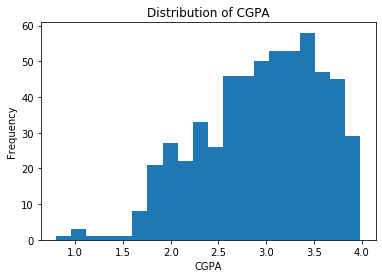

In [10]:
# Histogram of CGPA
plt.hist(grades['CGPA'], bins=20)
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.title('Distribution of CGPA')
plt.show()

Most of the students have CGPA in the range of 2.7-3.8.

Lets plot the yeary wise grades using regular expressions.

In [11]:
col = grades.columns.tolist()

In [12]:
# first year grades
import re

# Filter elements that match the pattern
pattern_1 = r'^[A-Z]{2}-1.*'
first_year = [element for element in col if re.match(pattern_1, element)]

# using the same to extract all other year 
pattern_2 = r'^[A-Z]{2}-2.*'
second_year = [element for element in col if re.match(pattern_2, element)]

pattern_3 = r'^[A-Z]{2}-3.*'
third_year = [element for element in col if re.match(pattern_3, element)]

pattern_4 = r'^[A-Z]{2}-4.*'
fourth_year = [element for element in col if re.match(pattern_4, element)]


In [13]:
# selecting first year values
first = grades[first_year]
first.head()

,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,ME-107,CS-107
0,B-,D+,C-,C,C-,D+,D,C-,B-,C-,C-
1,A,D,D+,D,B-,C,D,A,D+,D,B+
2,A,B,A,B-,B+,A,B-,B+,A-,A-,B-
3,D,C+,D+,D,D,A-,D+,C-,D,C+,D
4,A-,A-,A-,B+,A,A,A-,B+,A,A-,C


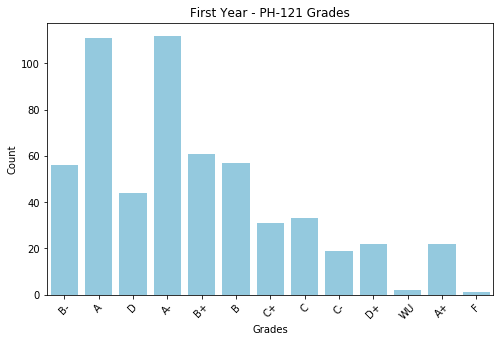

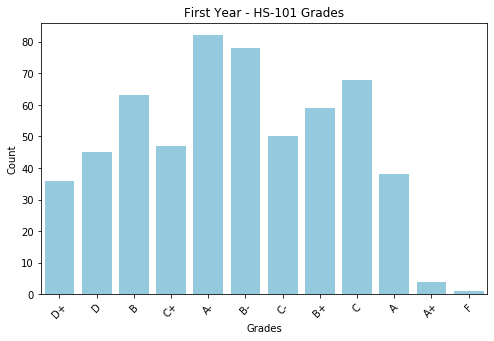

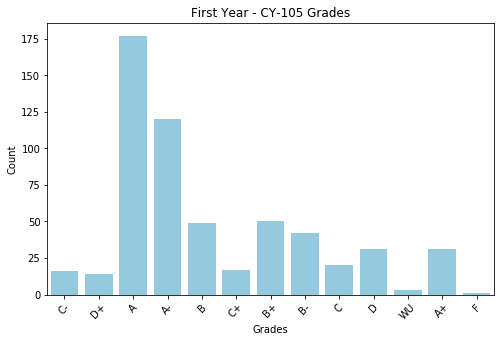

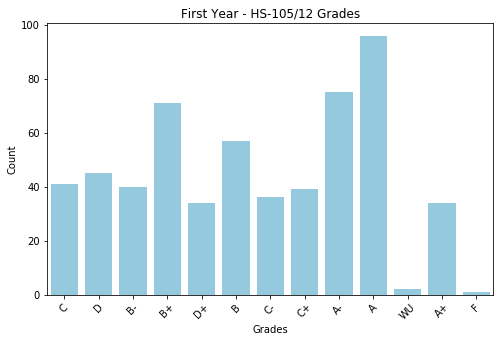

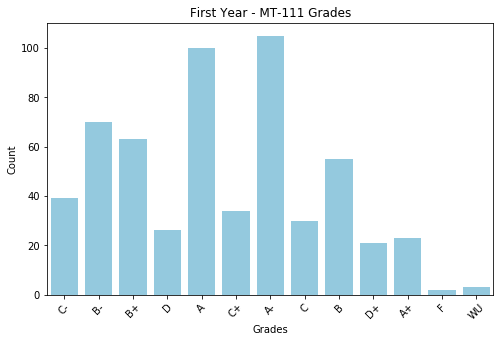

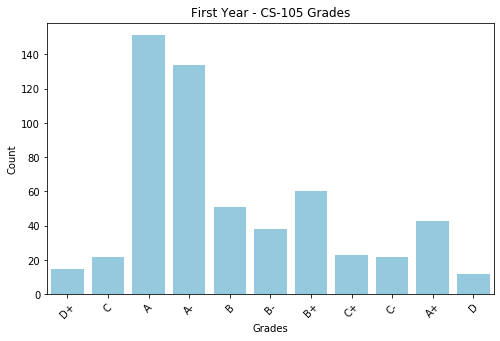

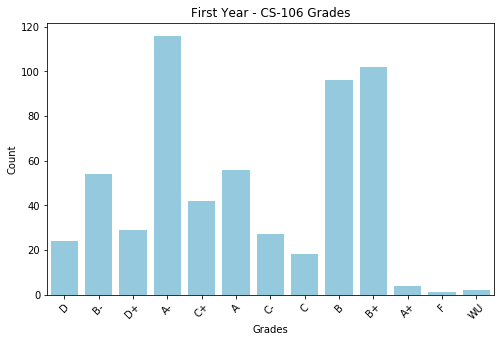

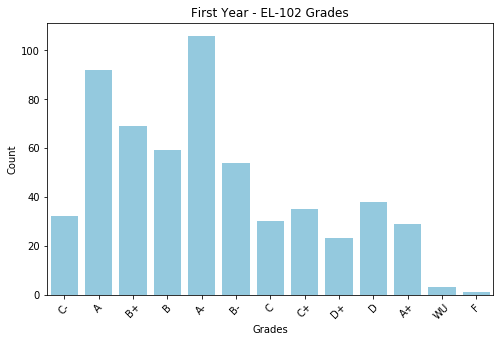

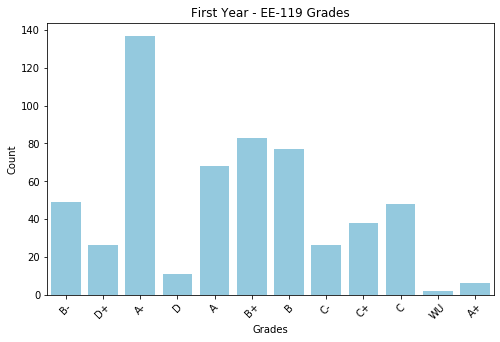

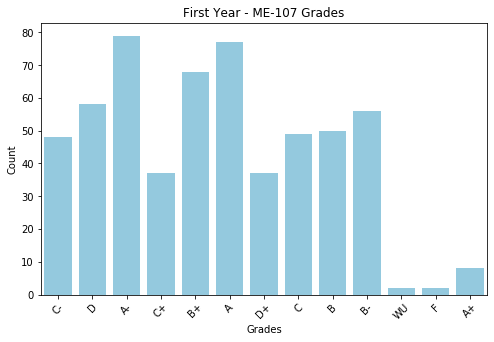

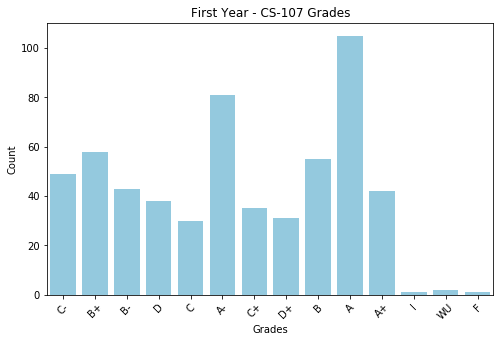

In [14]:
# Visualize count plot for each course in the first year
def visualize_countplot(df, year_name):
    for course in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=course, color='skyblue')
        plt.title(f'{year_name} Year - {course} Grades')
        plt.xlabel('Grades')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
        
visualize_countplot(first, 'First')

* PH-121: The majority of students received grades between A and C.The least common grades were A+, WU and F.
* HS-101: Grades are distributed across a wide range from A- to F. A, B, and C grades are most common, while A+ and F grades are rare.
* CY-105: The grades are mostly concentrated in the A to B range, with A being the most common. WU and F grades are uncommon.
* HS-105/12: A, A-, and B+ are the most frequent grades. Other grades like WU and F are less common.
* MT-111: A- and A are the dominant grades, while WU and F grades are infrequent.
* CS-105: The majority of students scored in the A and A- range.
* CS-106: A- and B+ are the most frequent grades. A+, WU and F grades are less common.
* EL-102: A- and A grades are the most common. The frequency of WU and F grades is low.
* EE-119: A- is the most common grade, followed by B+. A+, WU and D grades are less common.
* ME-107: A- and A grades are more common, while A+, WU and F grades are less frequent.
* CS-107: A and A- are the dominant grades, while I, WU and F is less common.

Overall, most courses have grades concentrated in the higher grade bands (A to B+). The distribution of grades varies between courses, the occurrence of F and A+ is less common, and Withdrawn (W) and Withdrawn Unofficially (WU) grades are rare.

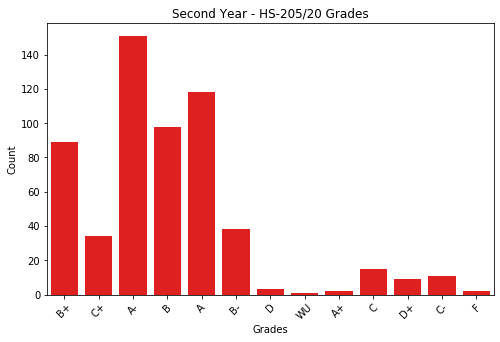

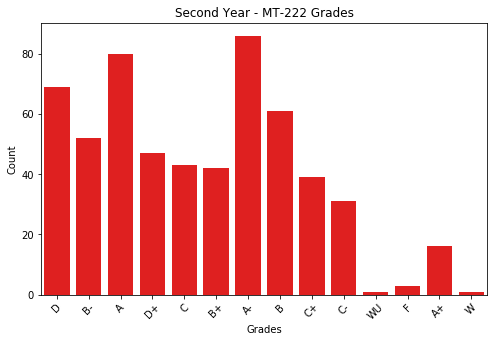

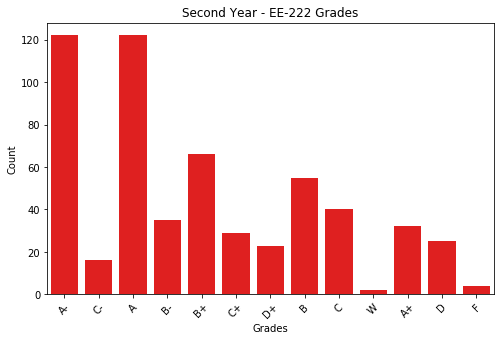

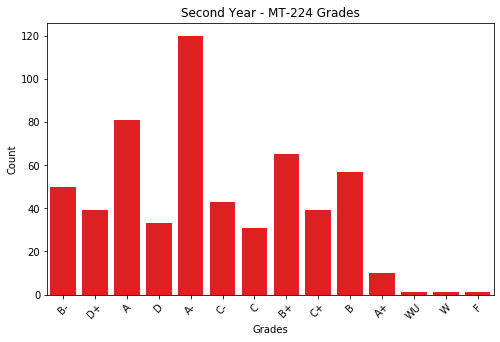

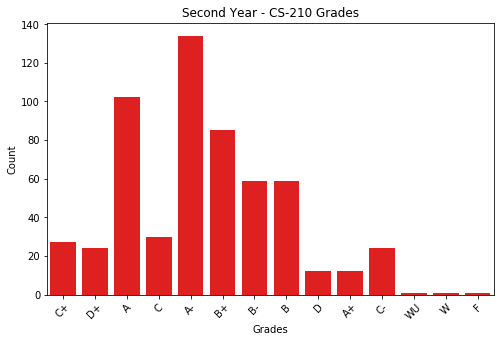

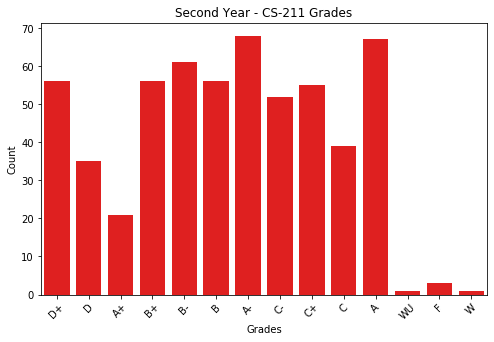

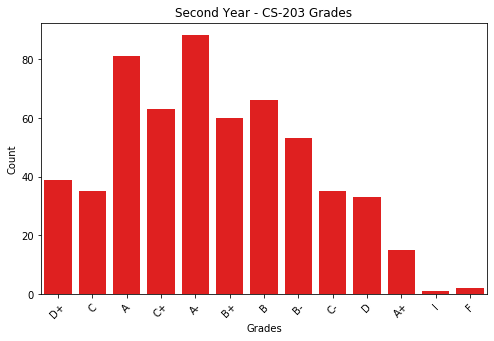

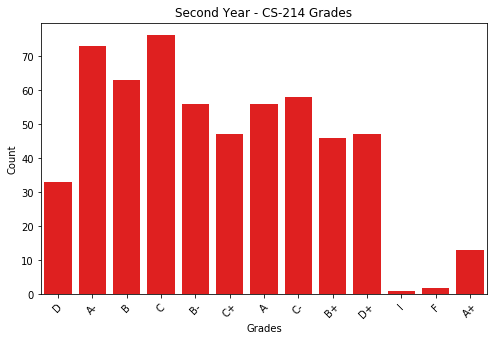

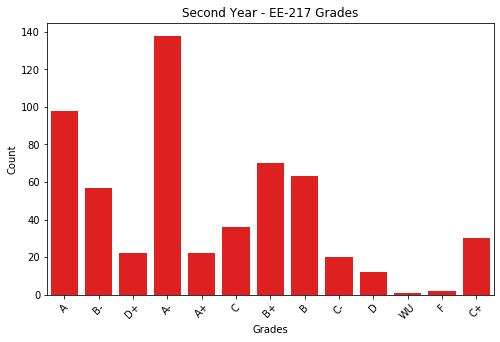

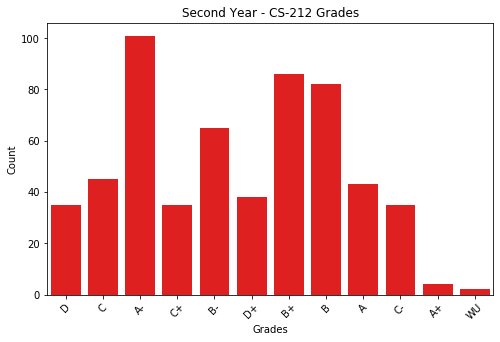

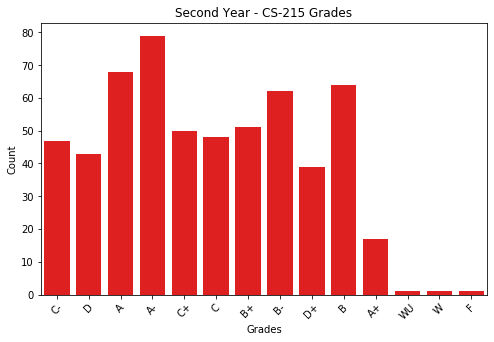

In [15]:
second = grades[second_year]

# Visualize count plot for each course in the second year
def visualize_countplot(df, year_name):
    for course in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=course, color='red')
        plt.title(f'{year_name} Year - {course} Grades')
        plt.xlabel('Grades')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
        
visualize_countplot(second, 'Second')

* HS-205/20: Grades are predominantly in the A- to B+ range, with A- being the most common grade. F , A+, D and WU grades are infrequent.
* MT-222: A and A- are the most common grades, followed by D and B. F, WU and W grades are rare.
* EE-222: A and A- are the dominant grades, with B+ being more common than B. F and W grades are infrequent.
* MT-224: A- and A are the most frequent grades. B+ and B- are also common. F, W, and WU grades are rare.
* CS-210: A- and A are the most common grades, followed by B+ and B. F, W, and WU grades are infrequent.
* CS-211: A- and A are the most frequent grades. B+ and B- are also common. F, W, and WU grades are rare.
* CS-203: A- and A are the dominant grades. C+ and B+ are also common. F and I (Incomplete) grades are infrequent.
* CS-214: C is the most common grade, followed by A- and B. F and I grades are rare.
* EE-217: A- is the most frequent grade, followed by A and B+. F and WU grades are infrequent.
* CS-212: A- and B+ are the most common grades, with B and B- being less frequent. A+ and WU grades are rare.
* CS-215: A- and A are the most frequent grades. B and B- are also common. F, W, and WU grades are rare

Overall, most courses have grades A and A-. The occurrence of grade F is generally less common, and Withdrawn (W) and Withdrawn Unofficially (WU) grades are rare.

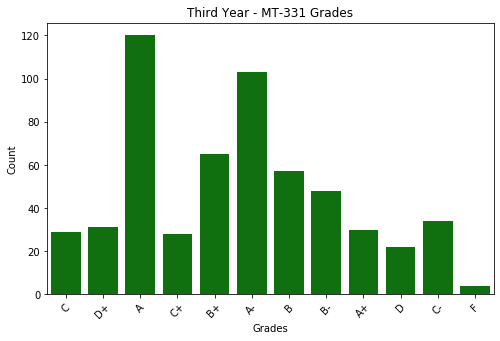

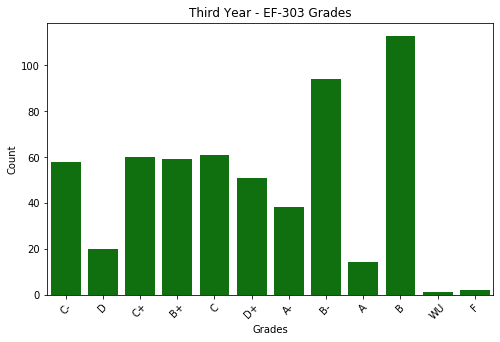

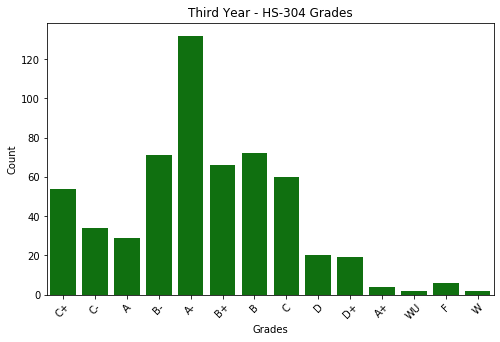

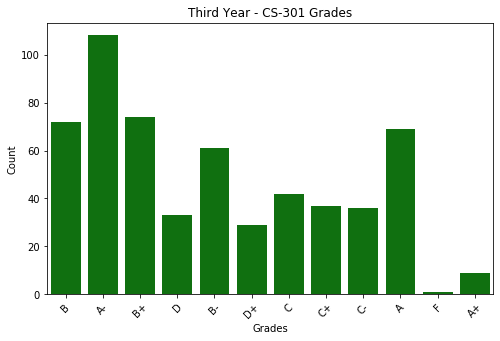

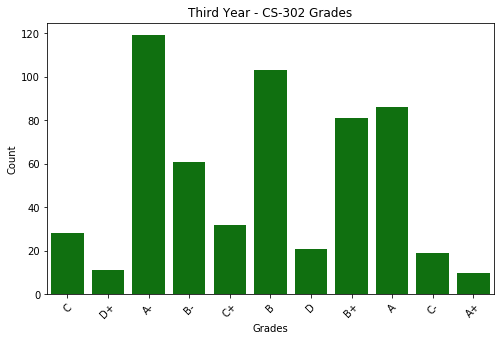

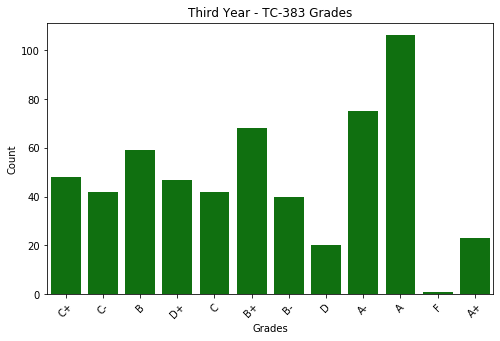

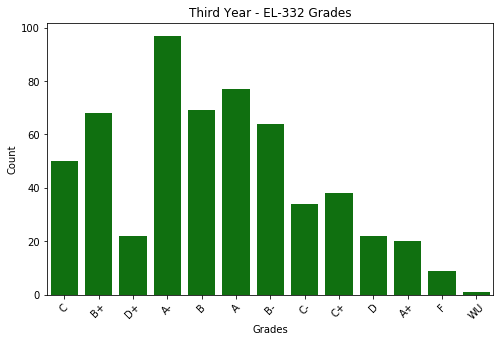

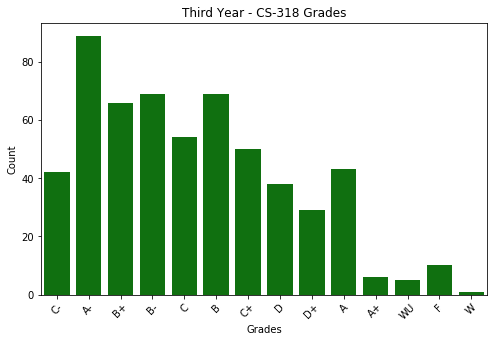

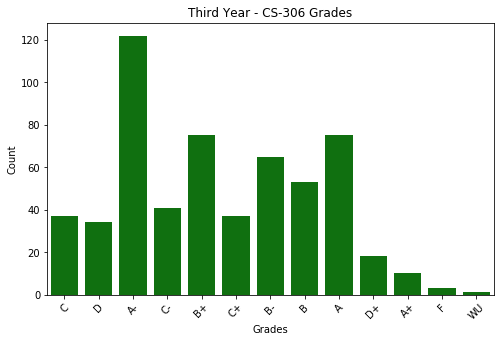

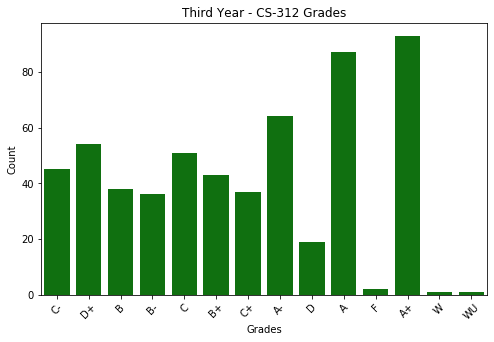

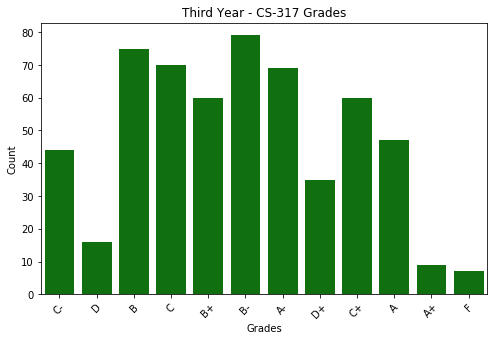

In [16]:
third = grades[third_year]

# Visualize count plot for each course in the second year
def visualize_countplot(df, year_name):
    for course in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=course, color='green')
        plt.title(f'{year_name} Year - {course} Grades')
        plt.xlabel('Grades')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
        
visualize_countplot(third, 'Third')

* EL-332: A- is the most common grade, followed by A and B+. F and WU grades are infrequent.
* CS-318: A- and B- are the most common grades, followed by B and B+. C and C+ grades are also common. F, A+, WU, and W grades are infrequent.
* CS-306: A- is the most frequent grade, followed by B+ and A. F, WU and A+ grades are rare.
* CS-312: A+ and A are the most common grades, with A- and D+ being less frequent. F, WU, and W grades are rare.
* CS-317: B- and B are the most frequent grades, with C and A- being common as well. F grades are infrequent.
* MT-331: A is the most common grade, followed by A- and B+. F grade is rare.
* EF-303: B is the most frequent grade, followed by B-. F and WU grades are infrequent.
* HS-304: A- is the most common grade, followed by B and B-. F, A+, W and WU grades are rare.
* CS-301: A- is the most frequent grade, followed by B+ and B. F grades are infrequent.
* CS-302: A- and B are the most common grades, followed by A and B+. D+, C-, A+ and D grades are less common.
* TC-383: A is the most frequent grade, followed by A- and B+. F grades are infrequent.

A- and B+ are common grades across multiple courses, indicating a relatively high performance level in these courses. F, WU A+ and W grades are infrequent in most courses, suggesting that the majority of students are performing reasonably well

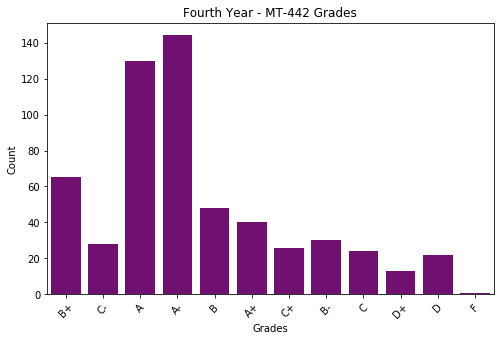

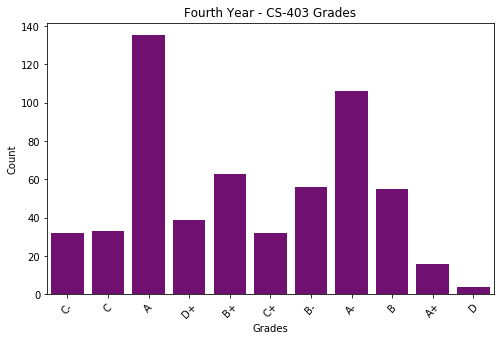

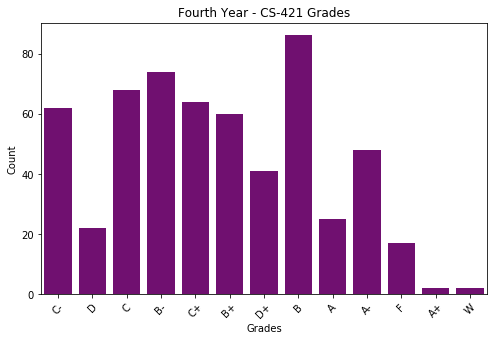

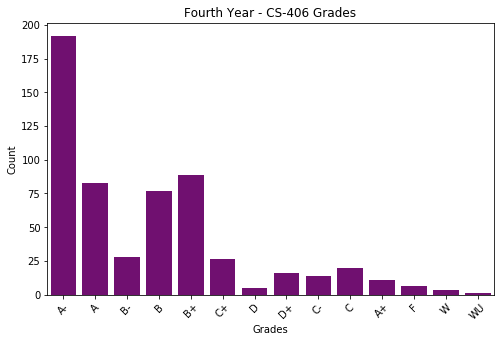

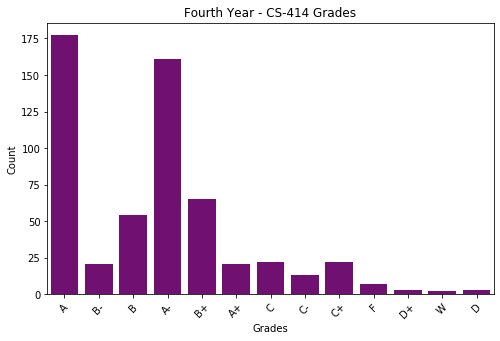

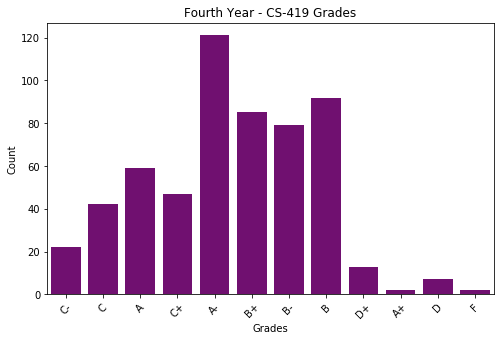

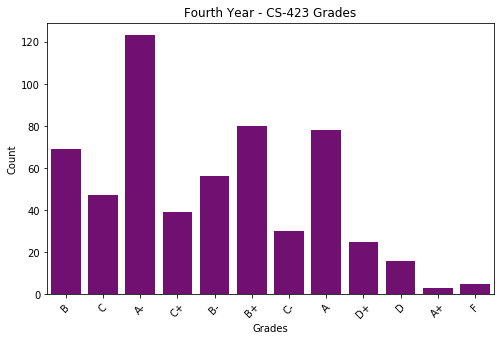

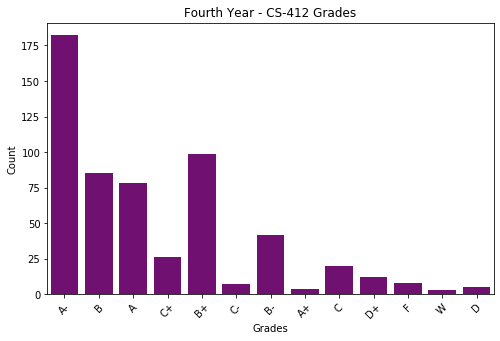

In [17]:
fourth = grades[fourth_year]

# Visualize count plot for each course in the second year
def visualize_countplot(df, year_name):
    for course in df.columns:
        plt.figure(figsize=(8, 5))
        sns.countplot(data=df, x=course, color='purple')
        plt.title(f'{year_name} Year - {course} Grades')
        plt.xlabel('Grades')
        plt.ylabel('Count')
        plt.xticks(rotation=45)
        plt.show()
        
visualize_countplot(fourth, 'Fourth')

* MT-442: A- is the most frequent grade, followed closely by A. Both grades represent a significant portion of the overall grades distribution. D+ and F grades has the least occurence.
* CS-403: A is the most frequent grade, followed by A- and B+. A+, F grades are infrequent.
* CS-421: B is the most common grade, followed by B- and C. A+ and W grades are present.
* CS-406: A- is the most frequent grade, followed by A and B+. D, D+, C, C-, A+, F, W and WU grades are les frequent.
* CS-414: A is the most common grade, followed by A- and B+. C and F grades are observed, and there are instances of W (Withdrawn) grades. D+ and D grades are infrequent.
* CS-419: A- is the most frequent grade, followed by B and B+. A+ and F grades are infrequent.
* CS-423: A- is the most common grade, followed by A and B+. A+ and F grades are infrequent.
* CS-412: A- is the most frequent grade, followed by B+ and B. A+, C-, W, D and F grades are infrequent.

In general, A- and B+ are common grades across multiple courses, suggesting that many students are performing well in these courses.

In [18]:
# adding CGPA column to evry year grades database
first['CGPA'] = grades['CGPA']
second['CGPA'] = grades['CGPA']
third['CGPA'] = grades['CGPA']
fourth['CGPA'] = grades['CGPA']

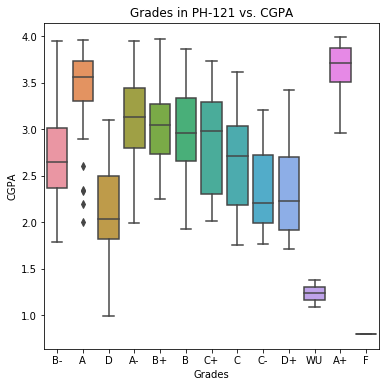

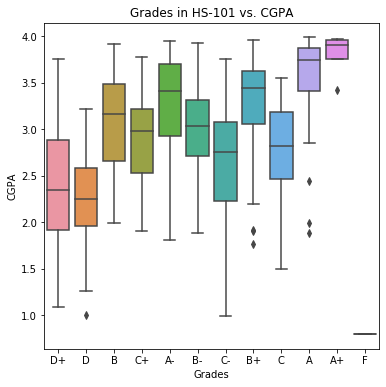

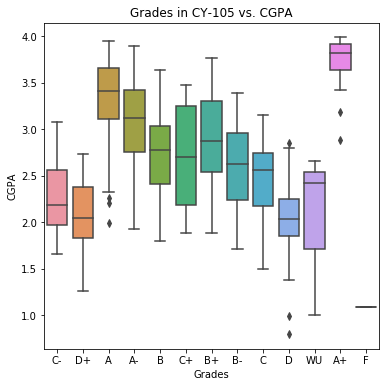

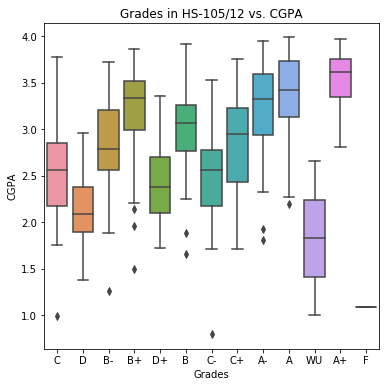

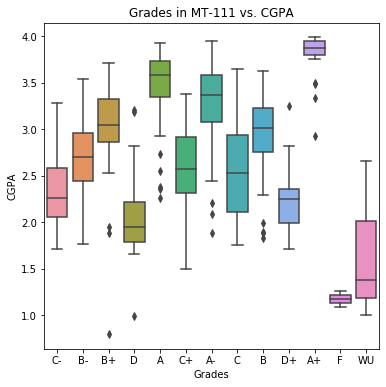

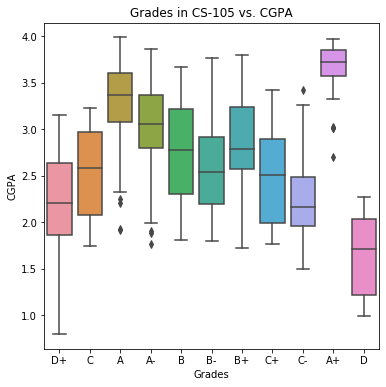

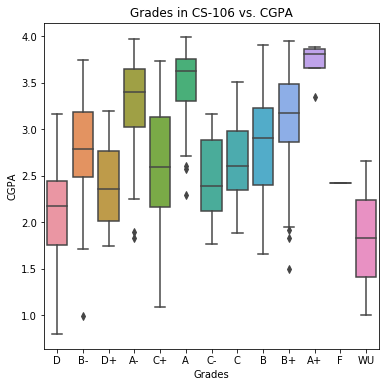

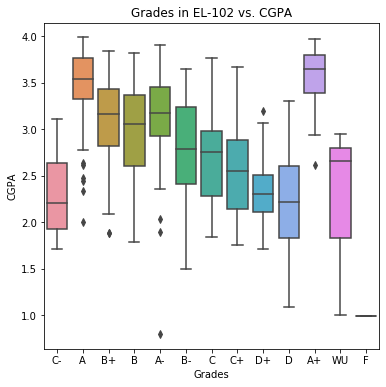

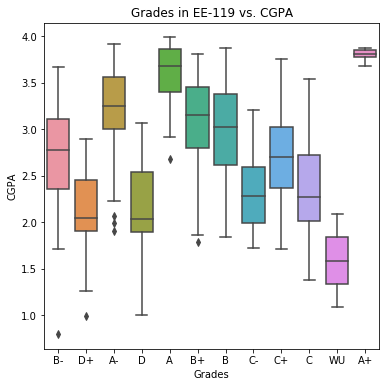

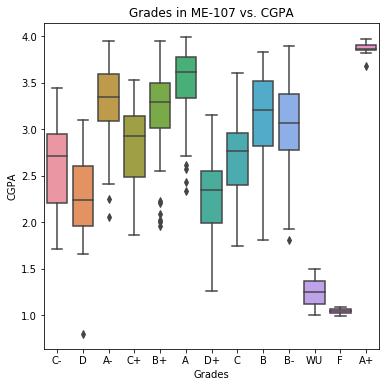

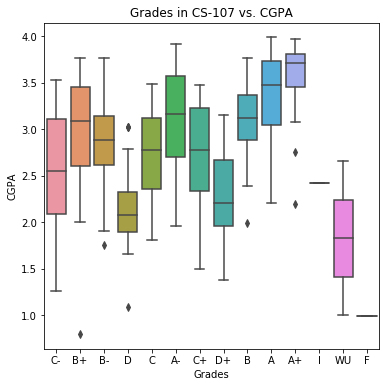

In [19]:
for cols in first.columns.drop('CGPA'):
    plt.figure(figsize=(6,6))
    sns.boxplot(data=first, x=cols, y='CGPA')
    plt.xlabel('Grades')
    plt.ylabel('CGPA')
    plt.title('Grades in {} vs. CGPA'.format(cols))
    plt.show()

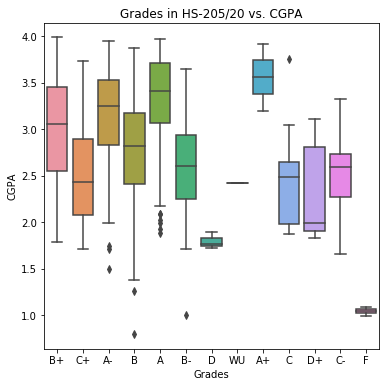

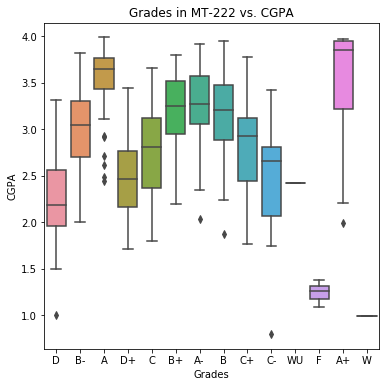

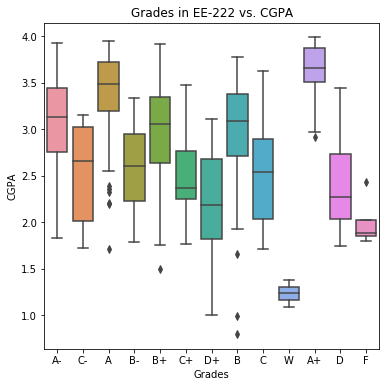

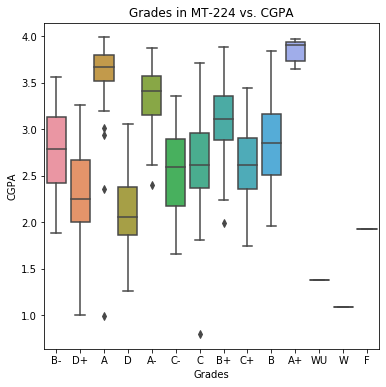

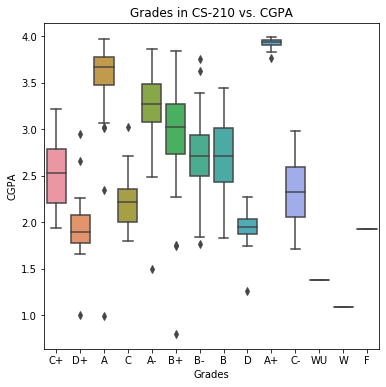

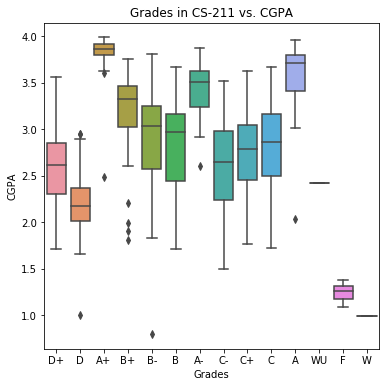

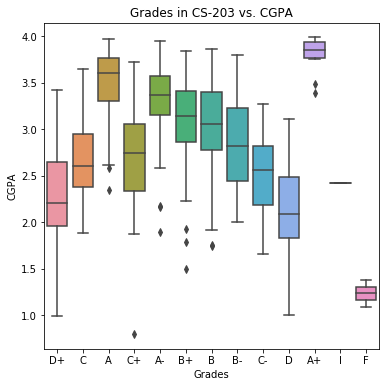

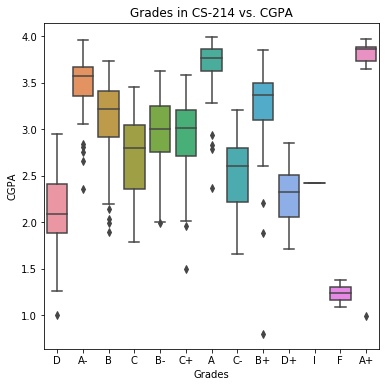

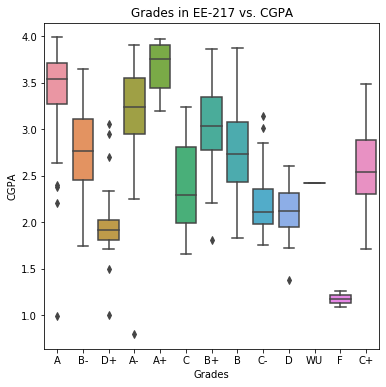

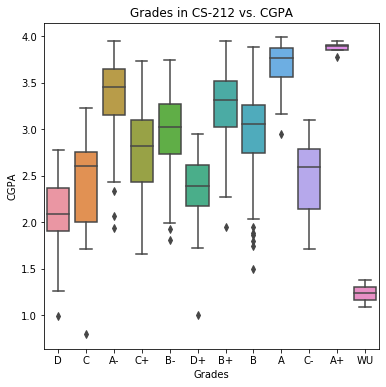

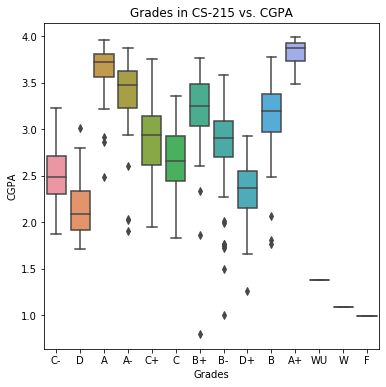

In [20]:
for cols in second.columns.drop('CGPA'):
    plt.figure(figsize=(6,6))
    sns.boxplot(data=second, x=cols, y='CGPA')
    plt.xlabel('Grades')
    plt.ylabel('CGPA')
    plt.title('Grades in {} vs. CGPA'.format(cols))
    plt.show()


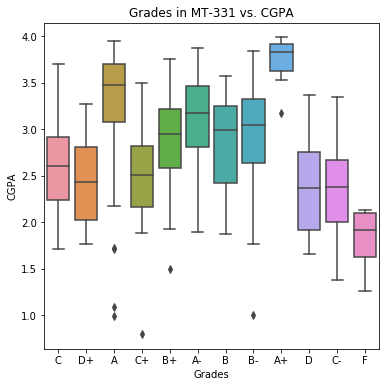

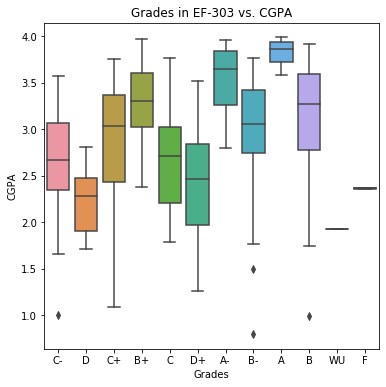

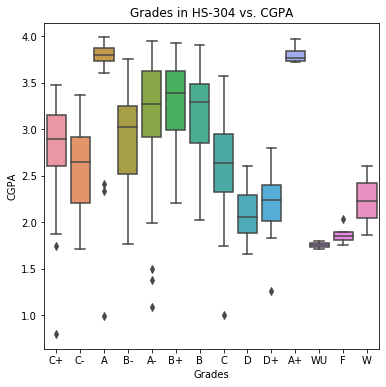

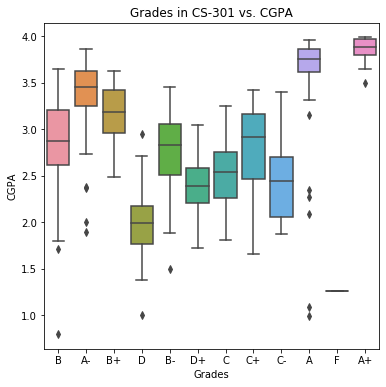

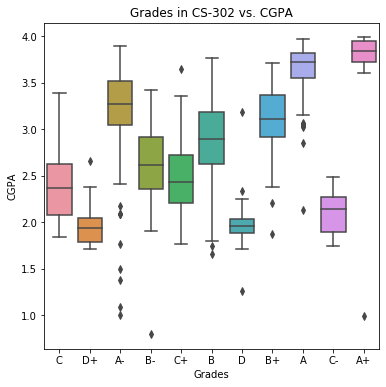

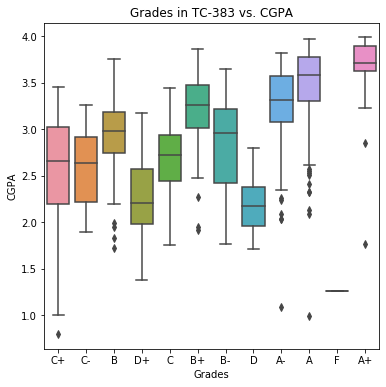

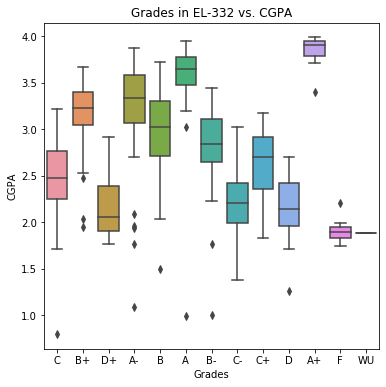

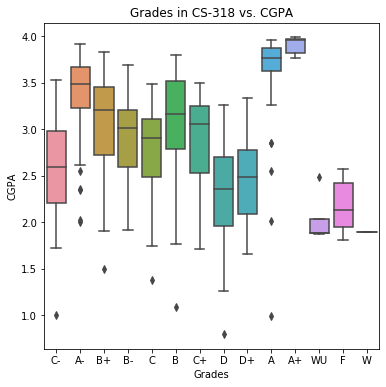

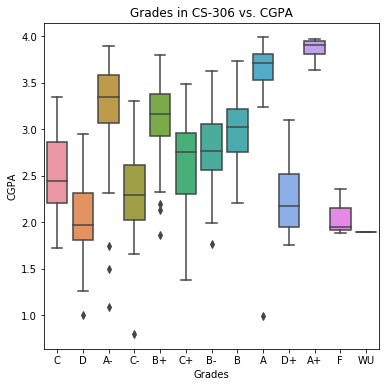

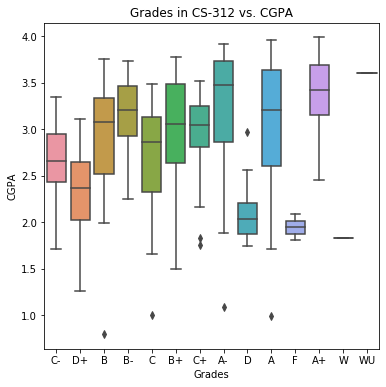

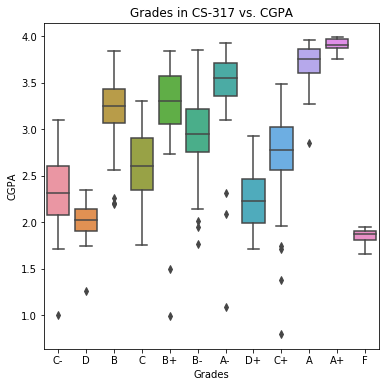

In [21]:
for cols in third.columns.drop('CGPA'):
    plt.figure(figsize=(6,6))
    sns.boxplot(data=third, x=cols, y='CGPA')
    plt.xlabel('Grades')
    plt.ylabel('CGPA')
    plt.title('Grades in {} vs. CGPA'.format(cols))
    plt.show()

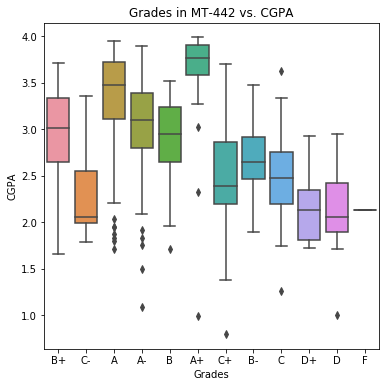

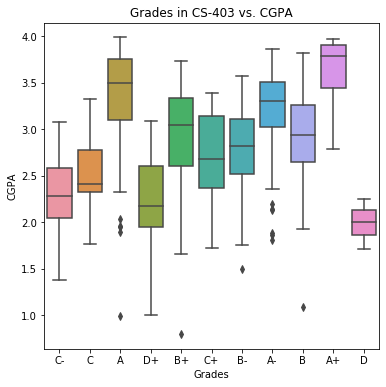

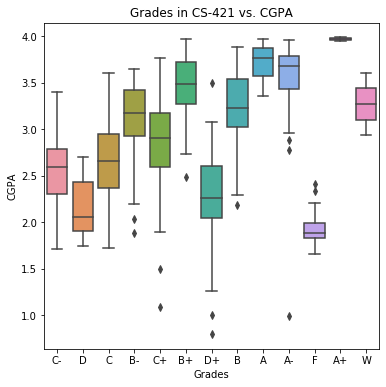

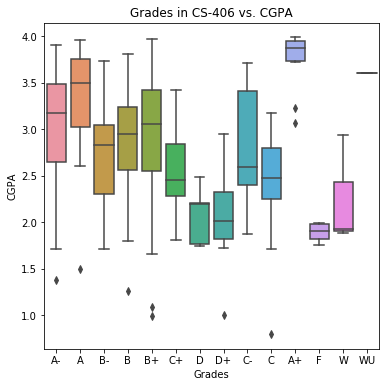

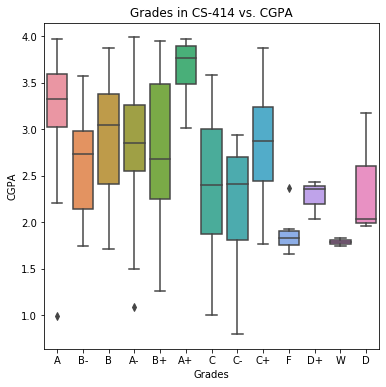

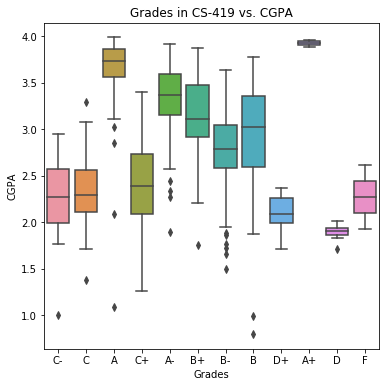

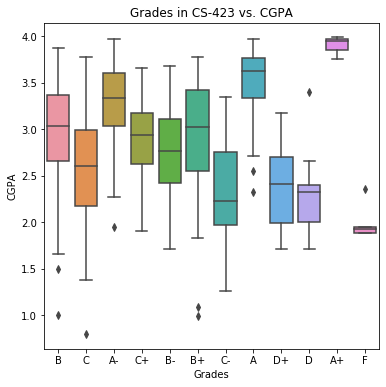

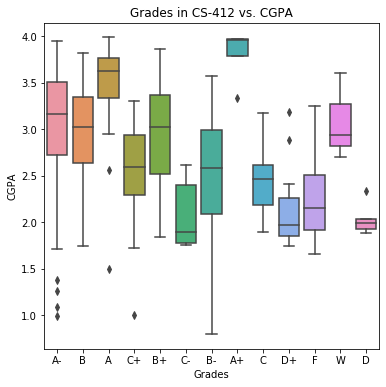

In [22]:
for cols in fourth.columns.drop('CGPA'):
    plt.figure(figsize=(6,6))
    sns.boxplot(data=fourth, x=cols, y='CGPA')
    plt.xlabel('Grades')
    plt.ylabel('CGPA')
    plt.title('Grades in {} vs. CGPA'.format(cols))
    plt.show()

* Depending upon the courses in the all the years, student who score grades F, I, WU or W, usually have their CGPA in the range of 1-2.5.

In [23]:
# we will use label encoder to convert categorical columns ino numericals
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each column

for col in grades.drop(['Seat No.', 'CGPA'], axis=1):
    grades[col] = label_encoder.fit_transform(grades[col])


In [24]:
# first 5 rows after encoding
grades.head()

,Seat No.,PH-121,HS-101,CY-105,HS-105/12,MT-111,CS-105,CS-106,EL-102,EE-119,...,CS-312,CS-317,CS-403,CS-421,CS-406,CS-414,CS-419,CS-423,CS-412,CGPA
0,CS-97001,5,10,8,6,8,10,9,8,5,...,8,8,8,8,2,0,8,3,2,2.205
1,CS-97002,0,9,10,9,5,6,9,0,10,...,10,9,6,9,2,5,6,6,3,2.008
2,CS-97003,0,3,0,5,4,0,5,4,2,...,3,3,0,6,0,0,0,2,0,3.608
3,CS-97004,9,7,10,9,9,2,10,8,9,...,10,6,10,8,5,3,7,7,7,1.906
4,CS-97005,2,2,2,4,0,0,2,4,0,...,5,4,4,5,2,0,2,2,0,3.448


In [25]:
# checking for skewness
grades.skew()

PH-121       0.549104
HS-101       0.053303
CY-105       0.974794
HS-105/12    0.323201
MT-111       0.475092
CS-105       0.930769
CS-106       0.630221
EL-102       0.496888
EE-119       0.576388
ME-107       0.095266
CS-107       0.407742
HS-205/20    0.873220
MT-222       0.160870
EE-222       0.745936
MT-224       0.395418
CS-210       0.707444
CS-211       0.085189
CS-203       0.245957
CS-214       0.015246
EE-217       0.710342
CS-212       0.388405
CS-215       0.139822
MT-331       0.593513
EF-303       0.338233
HS-304       0.510600
CS-301       0.371113
CS-302       0.598452
TC-383       0.301633
MT-442       0.839540
EL-332       0.425980
CS-318       0.311895
CS-306       0.385402
CS-312       0.402680
CS-317       0.134998
CS-403       0.591017
CS-421       0.115879
CS-406       1.205769
CS-414       1.243240
CS-419       0.450687
CS-423       0.484914
CS-412       1.169065
CGPA        -0.497203
dtype: float64

From the skewness values, we can observe that most of the columns have positive skewness, meaning that the majority of the data is concentrated towards the lower end, and there are some outliers on the higher end of the distribution.

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler

X = grades.drop(columns = ['CGPA', 'Seat No.'])
y = grades['CGPA']

# scaling the dataset
scaler = StandardScaler()
X_s = scaler.fit_transform(X)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_s,y, test_size = 0.25)
print("X_train :", X_train.shape)
print("y_train :", y_train.shape)
print("X_test :", X_test.shape)
print("y_test :", y_test.shape)

X_train : (428, 41)
y_train : (428,)
X_test : (143, 41)
y_test : (143,)


In [28]:
# importing libraries
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

models = [('Linear Regression', LinearRegression()), ('Lasso Regression', Lasso()),
          ('RFR', RandomForestRegressor()),('Support Vector_reg', SVR()),
          ('Tree_reg', DecisionTreeRegressor())]

predictions = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    predictions.append((name, y_pred))
    
metrics = []
for name, y_pred in predictions:
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    metrics.append((name, r2, mse, rmse, mae))

# Creating metrics dataframe
metrics_df = pd.DataFrame(metrics, columns=['Model_name', 'R2_score', 'Mean_Squared_Error',
                                            'Root_Mean_Squared_Error', 'Mean_Absolute_Error'])

metrics_df

,Model_name,R2_score,Mean_Squared_Error,Root_Mean_Squared_Error,Mean_Absolute_Error
0,Linear Regression,9.487137e-01,0.022900,0.151326,0.080429
1,Lasso Regression,-4.928091e-09,0.446507,0.668212,0.565324
2,RFR,8.923188e-01,0.048080,0.219272,0.118380
3,Support Vector_reg,9.391046e-01,0.027190,0.164894,0.087838
4,Tree_reg,8.073485e-01,0.086020,0.293292,0.189902


Based on these results, Linear Regression appears to be the best-performing model for this dataset as it has a high R2 score close to 1 and low error metrics(indicating that the model explains 91.20% of the variance in the target variable and provides accurate predictions), followed by RFR and Support Vector Regression. Lasso Regression and Tree Regression show relatively poorer performance.

In [29]:
# using cross val score on the other thre regressors
models = [('RFR', RandomForestRegressor()), ('Support Vector_reg', SVR()), ('Linear Regressor', LinearRegression())]
for name, model in models:
    cv_score = cross_val_score(model, X, y, cv=5)
    print('Model :', name)
    print('cv_score :',cv_score)
    print('Mean Score', cv_score.mean())
    print("Diffrenece between Mean CV Score and R2 score", (r2_score(y_test,y_pred)-cv_score.mean()))
    print("\n")

Model : RFR
cv_score : [0.91179481 0.88656603 0.82430414 0.91999275 0.82501591]
Mean Score 0.8735347278350393
Diffrenece between Mean CV Score and R2 score -0.06618622054393075


Model : Support Vector_reg
cv_score : [0.2589132  0.33858168 0.34774363 0.31660456 0.28982476]
Mean Score 0.31033356513673027
Diffrenece between Mean CV Score and R2 score 0.49701494215437825


Model : Linear Regressor
cv_score : [0.95575828 0.93920561 0.88828071 0.96946401 0.92227563]
Mean Score 0.9349968486684072
Diffrenece between Mean CV Score and R2 score -0.12764834137729864




Linear Regression model shows the highest mean cross-validation score, indicating good generalization performance. However, it also has the largest negative difference between the mean CV score and the R2 score, which raises concerns about overfitting. The Random Forest Regression model shows decent performance and moderate overfitting, while the Support Vector Regression model performs poorly and exhibits substantial overfitting.

In [30]:
# we will choose Linear Regression model
final = LinearRegression()
final.fit(X_s,y)
y_pred = final.predict(X_s)

In [31]:
# checking r2 score
print("R2_score :", r2_score(y,y_pred))

R2_score : 0.9540184843700527


In [32]:
# lets compare the results
compare = pd.DataFrame({'Actual Score':y, 'Predicted Score':y_pred})
compare.head()

,Actual Score,Predicted Score
0,2.205,2.194060
1,2.008,1.958605
2,3.608,3.652421
3,1.906,1.897713
4,3.448,3.502378


In [33]:
# saving the model
import joblib
joblib.dump(final, "Grade_Prediction.pkl")

['Grade_Prediction.pkl']